# Load Datasets

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import sklearn.tree
import sklearn.ensemble

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# SVM Classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [ ]:
# Clone repository in order to get access locally to the datasets
!git clone https://github.com/sergio-gimenez/anomaly-4G-detection

fatal: destination path 'anomaly-4G-detection' already exists and is not an empty directory.


In [ ]:
train = pd.read_csv('anomaly-4G-detection/ML-MATT-CompetitionQT2021_train.csv', sep=';')
test = pd.read_csv('anomaly-4G-detection/ML-MATT-CompetitionQT2021_test.xls', sep=';' )

In [ ]:
# Separate labels from data 
X = train.drop('Unusual', axis='columns')#.to_numpy()
y = train['Unusual']#.to_numpy()

# We split the data into training and validation subsets (80% and 20%) in
# order to validate our training
X_train, X_validation, y_train, y_validation = train_test_split(X, y, 
                                                                train_size=0.8,
                                                                random_state=1, stratify = y)
X_test = test

In [ ]:
#Refactor time feature to minuts and cellName to unique identifier 1:1
def getTimeInMinutes(x):
  hh, mm  = x.split(":")
  return int(hh)* 60 + int(mm)

def createCellNameDictionary(data):
  cellList = []
  for i in data["CellName"]:
    cellList.append(i)
  cellList = set(cellList)
  cellDict = {}
  for idx, value in enumerate(cellList):
    cellDict[value]=idx
  return cellDict

def refactorFeaturesDataframe(data):
  data["Time"] = data["Time"].apply(lambda x: getTimeInMinutes(x))
  cellNameDict = createCellNameDictionary(data);
  data["CellName"] = data["CellName"].apply(lambda x: cellNameDict[x])
  return data


In [ ]:
#Refactoring data from features to useful values
X_train = refactorFeaturesDataframe(X_train).to_numpy()
y_train = y_train.to_numpy()

X_validation = refactorFeaturesDataframe(X_validation).to_numpy()
y_validation = y_validation.to_numpy()

X_test = refactorFeaturesDataframe(test).to_numpy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Using PCA and MDA


In [ ]:
from sklearn.decomposition import PCA
# #for n_features in range(1, len(X_train.shape[-1])):

# # TODO Do scalling here
# pca = PCA(n_components=3)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_validation  = pca.transform(X_validation)
# X_test  = pca.transform(X_test)

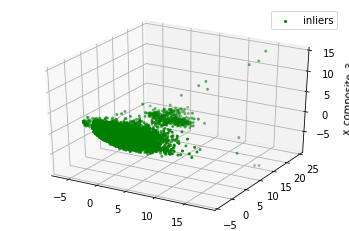

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# pca = PCA(n_components=3)  # Reduce to k=3 dimensions
# scaler = StandardScaler()
# #normalize the metrics
# X_norm = scaler.fit_transform(X_train)
# X_reduce = pca.fit_transform(X_norm)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_zlabel("x_composite_3")# Plot the compressed data points
# ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")# Plot x's for the ground truth outliers


# ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
#            lw=2, s=60, marker="x", c="red", label="outliers")
# ax.legend()
# plt.show()

# Solving the Classification Problem

## Decision Tree

In [ ]:
# clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
# clf.fit(X_train, y_train)

In [ ]:
# pred_train = clf.predict(X_train)
# pred_val = clf.predict(X_validation)

In [ ]:
# print("TRAINING\n" + classification_report(y_train, pred_train))
# print("\nTESTING\n" + classification_report(y_validation, pred_val))

In [ ]:
# train_error = 1. - accuracy_score(y_train, pred_train)
# train_cmat = confusion_matrix(y_train, pred_train)
# val_error = 1. - accuracy_score(y_validation, pred_val)
# val_cmat = confusion_matrix(y_validation, pred_val)

# print('train error: %f ' % train_error)
# print('train confusion matrix:')
# print(train_cmat)
# print('test error: %f ' % val_error)
# print('test confusion matrix:')
# print(val_cmat)

## Non-linear SVM Classifier

In [ ]:
svm_clf = SVC(kernel="rbf")

svm_model = Pipeline([
    ('center', StandardScaler()),
    ('clf', svm_clf)
])

In [ ]:
#svm_model.fit(X_train, y_train)
# svm_clf.fit(X_train, y_train)

In [ ]:
# svm_model_pred_train = svm_model.predict(X_train)
# svm_model_pred_val = svm_model.predict(X_validation)

# print("TRAINING\n" + classification_report(y_train, svm_model_pred_train))
# print("\nTESTING\n" + classification_report(y_validation, svm_model_pred_val))

In [ ]:
# svm_train_error = 1. - accuracy_score(y_train, svm_model_pred_train)
# svm_train_cmat = confusion_matrix(y_train, svm_model_pred_train)
# svm_val_error = 1. - accuracy_score(y_validation, svm_model_pred_val)
# svm_val_cmat = confusion_matrix(y_validation, svm_model_pred_val)

# print('train error: %f ' % svm_train_error)
# print('train confusion matrix:')
# print(svm_train_cmat)
# print('test error: %f ' % svm_val_error)
# print('test confusion matrix:')
# print(svm_val_cmat)

## Non-linear SVM hyper-parameter search


In [ ]:
Cs = [1, 5, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]

In [ ]:
grid_search = GridSearchCV(svm_model,
                           param_grid={"clf__C": Cs, "clf__gamma": gammas},
                           cv=ShuffleSplit(n_splits=1, train_size=0.75),
                           return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
# Calling predict makes predictions using the best set of hyper-parameters
pred_train = grid_search.predict(X_train)
pred_val = grid_search.predict(X_validation)

# print classification report 
print("CLASSIFICATION REPORT:\n----------------------")
print("TRAINING\n" + classification_report(y_train, pred_train))
print("\nTESTING\n" + classification_report(y_validation, pred_val))

# print error and confusion matrices
print("\nERROR & CONF. MATRIX:\n---------------------")
train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)
test_error = 1. - accuracy_score(y_validation, pred_val)
test_cmat = confusion_matrix(y_validation, pred_val)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)

print('\ntest error: %f ' % test_error)
print('test confusion matrix:')
print(test_cmat)

In [ ]:
clf = grid_search

## Test Prediction

In [ ]:
pred_test = clf.predict(X_test)

# Submission Formatting

In [ ]:
%%shell
# Create submission file if it does not exists
file=predictions.csv
if [ ! -e "$file" ] ; then
    touch anomaly-4G-detection/"$file"
fi

In [ ]:
# Create index column in data frame object
submission_dataframe = pd.DataFrame(np.arange(1, 9159), columns=['Id']) 

# Append predictions of test data as column
submission_dataframe['Label'] = pred_test

# Convert Data Frame object to CSV
submission_dataframe.to_csv('predictions.csv', index=False)

!mv predictions.csv anomaly-4G-detection/
predictions = pd.read_csv('anomaly-4G-detection/predictions.csv')
predictions

In [ ]:
#!rm anomaly-4G-detection/predictions.csv